In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from imblearn.over_sampling import SMOTE

from textblob import TextBlob

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Input, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import backend as K
from collections import defaultdict


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving upload_DJIA_table.csv to upload_DJIA_table (1).csv


In [ ]:
df=pd.read_csv("Combined_News_DJIA.csv")

In [ ]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [ ]:
df.shape

(1989, 27)

In [ ]:
df.isnull().sum()

,0
Date,0
Label,0
Top1,0
Top2,0
Top3,0
Top4,0
Top5,0
Top6,0
Top7,0
Top8,0


In [ ]:
#removing the missing values
df=df.dropna()

In [ ]:
# total number of duplicated rows
df.duplicated().sum()

np.int64(0)

In [ ]:
# number of occurrences of each unique value in the "Label" column
df["Label"].value_counts()

,count
Label,
1,1062
0,924


/tmp/ipython-input-10-3719665276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Label",palette="Set2")


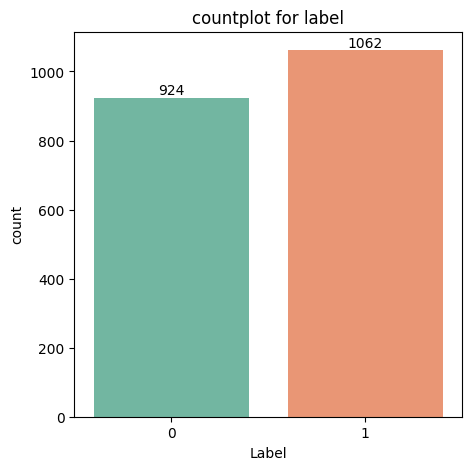

In [ ]:
#plot for lable
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="Label",palette="Set2")
plt.title("countplot for label")

# Adding data labels on top of the bars
for bar in plt.gca().patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, height, str(int(height)), ha='center', va='bottom')

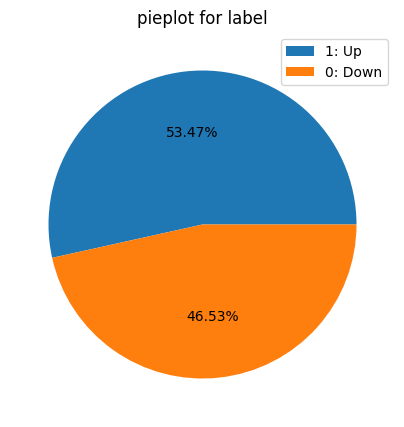

In [ ]:
plt.figure(figsize=(5,5))
labels=["1: Up","0: Down"]
plt.pie(x=df["Label"].value_counts(),autopct="%0.2f%%")
plt.title("pieplot for label")
plt.legend(labels)

In [ ]:
# Combine news headlines as one column
df["combined news"]=df.loc[:,"Top1":"Top25"].astype(str).agg(" ".join,axis=1)


In [ ]:
df["combined news"][0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [ ]:
#cleaning the text column

stop=set(stopwords.words("english"))
lemmatizer=WordNetLemmatizer()

def clean_text(text):
  text=re.sub(r"b[\"']"," ",text.lower())
  text=re.sub(r"\[.*?\]\(.*?\)","",text)
  text=re.sub(r"[^\w\s]"," ",text)
  text=re.sub(r"\s+"," ",text)
  tokens=word_tokenize(text)
  output=[lemmatizer.lemmatize(words) for words in tokens if words.isalpha() and words not in stop]
  return " ".join(output)

df["clean text"]=df["combined news"].apply(clean_text)

In [ ]:
df["clean text"][0]

'georgia down two russian warplane country move brink war breaking musharraf impeached russia today column troop roll south ossetia footage fighting youtube russian tank moving towards capital south ossetia reportedly completely destroyed georgian artillery fire afghan child raped impunity u n official say sick three year old raped nothing russian tank entered south ossetia whilst georgia shoot two russian jet breaking georgia invades south ossetia russia warned would intervene side enemy combatent trial nothing sham salim haman sentenced year kept longer anyway feel like georgian troop retreat osettain capital presumably leaving several hundred people killed video u prep georgia war russia rice give green light israel attack iran say u veto israeli military ops announcing class action lawsuit behalf american public fbi russia georgia war nyt top story opening ceremony olympics fucking disgrace yet proof decline journalism china tell bush stay country affair world war iii start today g

In [ ]:
df2=pd.read_csv("upload_DJIA_table.csv")

In [ ]:
df2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [ ]:
df2.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


In [ ]:
df2.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [ ]:
#df['Date'] = pd.to_datetime(df['Date'])
#df2['Date'] = pd.to_datetime(df2['Date'])

#merge the news dataset and stock price dataset
df_merged=pd.merge(df,df2,on="Date",how="inner")

In [ ]:
df_merged.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top24,Top25,combined news,clean text,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""Georgia 'downs two Russian warplanes' as cou...",georgia down two russian warplane country move...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'Why wont America and Nato help us? If they w...,wont america nato help u wont help u help iraq...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",b'Remember that adorable 9-year-old who sang a...,remember adorable year old sang opening ceremo...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,b' U.S. refuses Israel weapons to attack Iran:...,u refuse israel weapon attack iran report pres...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,b'All the experts admit that we should legalis...,expert admit legalise drug war south osetia pi...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


# **vader textblob**

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyse=SentimentIntensityAnalyzer()

analyse.polarity_scores(df["clean text"][1])

{'neg': 0.284, 'neu': 0.613, 'pos': 0.103, 'compound': -0.9895}

In [ ]:

def get_sentiment(text):
    return analyse.polarity_scores(str(text))

In [ ]:
#get Sentiment score for each day:

compound = []
neg = []
pos = []
neu = []

for i in range(len(df["clean text"])):
    SIA = get_sentiment(df["clean text"].iloc[i])
    compound.append(SIA["compound"])
    neg.append(SIA["neg"])
    pos.append(SIA["pos"])
    neu.append(SIA["neu"])

df["compound"] = compound
df["neg"] = neg
df["pos"] = pos
df["neu"] = neu

In [ ]:
df_merged["compound"]=compound
df_merged["neg"]=neg
df_merged["pos"]=pos
df_merged["neu"]=neu

In [ ]:
df_merged.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Open,High,Low,Close,Volume,Adj Close,compound,neg,pos,neu
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,-0.9971,0.287,0.067,0.646
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,-0.9895,0.284,0.103,0.613
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,-0.9942,0.259,0.091,0.650
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,-0.9712,0.199,0.104,0.697
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,-0.9855,0.249,0.131,0.620


In [ ]:
df_merged.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'combined news', 'clean text', 'Open', 'High', 'Low',
       'Close', 'Volume', 'Adj Close', 'compound', 'neg', 'pos', 'neu'],
      dtype='object')

In [ ]:
x=df_merged[['Open','High', 'Low', 'Close', 'Volume', 'Adj Close', 'compound', 'neg', 'pos','neu']]
y=df_merged["Label"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [ ]:
#x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

train = df_merged[df_merged['Date'] < '20150101']
test = df_merged[df_merged['Date'] > '20141231']
x_train = x.loc[train.index]
x_test = x.loc[test.index]
y_train = y.loc[train.index]
y_test = y.loc[test.index]


**we use two mthods for finding onjectivity and subjectivity:**

1. first we try TextBlob to calculate subjectivity
2. then we use PyTorch Neural networks(preclassified data 5000 subjective and 5000 objective sentences retrieved from Cornel university data library to train and test)

## **the aim is to find:**

1.Stock price movement (classification: up/down)

2.Stock price value (regression: exact price)

for Subjectivity/Objectivity Classification, PyTorch neural network (CNN with ReLU and Dropout) is trained on 5,000 subjective + 5,000 objective sentences from the Cornell dataset

we use GloVe word embeddings to convert text into vector format

Resulting classifier is used to score news headlines daily

# **STEP 1: Load and clean the data**

In [ ]:
#Prepare the Cornell Subjectivity Dataset
from google.colab import files
uploaded = files.upload()

Saving quote.tok.gt9.5000 to quote.tok.gt9.5000


In [ ]:
# contains 5000 subjective sentences (opinions, emotions)

with open("quote.tok.gt9.5000", "r", encoding="ISO-8859-1") as f:
    subjective = f.readlines()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving plot.tok.gt9.5000 to plot.tok.gt9.5000


In [ ]:
# contains 5000 objective sentences (factual movie plots)
with open("plot.tok.gt9.5000", "r", encoding="ISO-8859-1") as f:
    objective = f.readlines()

In [ ]:

#Build a vocabulary dictionary from our training sentences

def read_file(path):
    """ Read file returns a shuttled list.
    """
    with open(path, encoding = "ISO-8859-1") as f:
        content = np.array(f.readlines())
    return content

def get_vocab(content):
    """Computes Dict of counts of words.
    Computes the number of times a word is on a document.
    """
    vocab = defaultdict(float)
    for line in content:
        words = set(line.split())
        for word in words:
            vocab[word] += 1
    return vocab

In [ ]:
# Step 1: Download the dataset
!wget http://www.cs.cornell.edu/people/pabo/movie-review-data/rotten_imdb.tar.gz

# Step 2: Make a folder called 'data'
!mkdir -p data

# Step 3: Extract into the 'data' folder
!tar -xvzf rotten_imdb.tar.gz -C data

--2025-06-28 18:40:18--  http://www.cs.cornell.edu/people/pabo/movie-review-data/rotten_imdb.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.53
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.53|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.cs.cornell.edu/people/pabo/movie-review-data/rotten_imdb.tar.gz [following]
--2025-06-28 18:40:18--  https://www.cs.cornell.edu/people/pabo/movie-review-data/rotten_imdb.tar.gz
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519599 (507K) [application/x-gzip]
Saving to: ‘rotten_imdb.tar.gz’

rotten_imdb.tar.gz  100%[===================>] 507.42K  2.77MB/s    in 0.2s    

2025-06-28 18:40:18 (2.77 MB/s) - ‘rotten_imdb.tar.gz’ saved [519599/519599]

quote.tok.gt9.5000
plot.tok.gt9.5000
subjdata.README.1.0


In [ ]:

def read_file(path):
    """Reads a file and returns lines as a numpy array."""
    with open(path, encoding="ISO-8859-1") as f:
        return np.array([line.strip().lower() for line in f.readlines()])

# Load data
subjective = read_file('data/quote.tok.gt9.5000')  # 5000 subjective sentences
objective = read_file('data/plot.tok.gt9.5000')    # 5000 objective sentences

# Check
print("Number of subjective sentences:", len(subjective))
print("Number of objective sentences:", len(objective))


Number of subjective sentences: 5000
Number of objective sentences: 5000


In [ ]:
# prepare the input (X) and target labels (y) for training your subjectivity/objectivity classification model
PATH = './data/' #This specifies the folder where the Cornell dataset files are stored
sub_content = read_file(PATH + "quote.tok.gt9.5000") # subjective sentences
obj_content = read_file(PATH + "plot.tok.gt9.5000") # objective sentences

# Normalize the text
# Removes leading/trailing whitespace
#Converts all characters to lowercase

sub_content = np.array([line.strip().lower() for line in sub_content])
obj_content = np.array([line.strip().lower() for line in obj_content])

sub_y = np.zeros(len(sub_content)) # Label 0 = subjective
obj_y = np.ones(len(obj_content)) # Label 1 = objective

# Combine the data
# x is Text input (10,000 sentences)
# y iy Labels (0 = subjective, 1 = objective)
X = np.append(sub_content, obj_content)
y = np.append(sub_y, obj_y)

In [ ]:
# Once we had all 10,000 labeled sentences ready (subjective and objective), we split them into three parts, train set, valisdation set, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
# getting vocab from training sets by counting how many times each word appears across all the training sentences
data_vocab = get_vocab(X_train)

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving glove.6B.300d.txt to glove.6B.300d.txt


In [ ]:
# Load GloVe Word Embeddings
def load_glove_embeddings(gloveFile="glove.6B.300d.txt"):
    """Loads GloVe word vectors into a dictionary."""
    word_vecs = {}
    with open(gloveFile, 'r', encoding='utf-8') as f:
        for line in f:
            splitLine = line.strip().split()
            word = splitLine[0]
            vector = np.array(splitLine[1:], dtype=np.float32)
            word_vecs[word] = vector
    return word_vecs

word_vecs = load_glove_embeddings()
print(f"Loaded {len(word_vecs)} word vectors.")

Loaded 400000 word vectors.


In [ ]:
# Load GloVe Word Embeddings into a Dictionary
def load_glove_embeddings(gloveFile="glove.6B.300d.txt"):
    """ Loads word vectors into a dictionary."""
    f = open(gloveFile,'r')
    word_vecs = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        word_vecs[word] = np.array([float(val) for val in splitLine[1:]])
    return word_vecs

word_vecs = load_glove_embeddings()

In [ ]:
# Compare Size of Loaded Embeddings and  Vocabulary in our Dataset
print(len(word_vecs.keys()), len(data_vocab.keys()))

400000 21415


In [ ]:
#the function delete_rare_words clean our vocabulary (data_vocab) by removing words that are Too rare and Not present in the pre-trained GloVe embeddings (word_vecs)

def delete_rare_words(word_vecs, data_vocab, min_df=2):
    """ Deletes rare words from data_vocab

    Deletes words from data_vocab if they are not in word_vecs
    and don't have at least min_df occurrencies in data_vocab.
    """
    words_delete = []
    for word in data_vocab:
        if data_vocab[word] < min_df and word not in word_vecs:
            words_delete.append(word)
    for word in words_delete: data_vocab.pop(word)
    return data_vocab

print(len(data_vocab.keys()))
data_vocab = delete_rare_words(word_vecs, data_vocab, min_df=2)
len(data_vocab.keys())

21415


18756

In [ ]:
#the function create_embedding_matrix prepares the embedding matrix needed to feed word embeddings into your deep learning model

def create_embedding_matrix(word_vecs, data_vocab, min_df=2, D=300):
    """Creates embedding matrix from word vectors. """
    data_vocab = delete_rare_words(word_vecs, data_vocab, min_df) # Remove words that are too rare and not in GloVe.
    V = len(data_vocab.keys()) + 2
    vocab2index = {}
    W = np.zeros((V, D), dtype="float32")
    vocab = ["", "UNK"]
    # adding a vector for padding
    W[0] = np.zeros(D, dtype='float32')
    # adding a vector for rare words
    W[1] = np.random.uniform(-0.25,0.25,D)
    vocab2index["UNK"] = 1
    i = 2
    for word in data_vocab:
        if word in word_vecs:
            W[i] = word_vecs[word]
            vocab2index[word] = i
            vocab.append(word)
            i += 1
        else:
            W[i] = np.random.uniform(-0.25,0.25,D)
            vocab2index[word] = i
            vocab.append(word)
            i += 1
    return W, np.array(vocab), vocab2index

pretrained_weight, vocab, vocab2index = create_embedding_matrix(word_vecs, data_vocab)

In [ ]:
# check the number of rows in the pretrained_weight matrix, which represents the total number of unique tokens
len(pretrained_weight) # note that index 0 is for padding

18758

In [ ]:
# This function encodes a sentence into a numeric vector of length N where each number corresponds to a word index from our vocab2index dictionary
def encode_sentence(s, N=40):
    enc = np.zeros(N, dtype=np.int32) # Create a zero array of length N (for padding)
    enc1 = np.array([vocab2index.get(w, vocab2index["UNK"]) for w in s.split()])
    # Convert each word in the sentence to its corresponding index from vocab2index
    # If the word is not found, use the index for "UNK" (unknown)
    l = min(N, len(enc1))  # Determine how many words to keep (max N)
    enc[:l] = enc1[:l] # Fill in the known words; remaining stay as 0 (padding)
    return enc

# Apply to all data splits
x_train = np.vstack([encode_sentence(x) for x in X_train])
x_val = np.vstack([encode_sentence(x) for x in X_val])
x_test = np.vstack([encode_sentence(x) for x in X_test])

In [ ]:
encode_sentence(X_train[0])

array([10,  8,  7,  9,  2, 11, 12,  9,  4,  5,  6,  3,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0], dtype=int32)

1D Convolutional Model
Notation:

V -- vocabulary size
D -- embedding size
N -- MAX Sentence length

In [ ]:
#1D Convolutional Neural Network (CNN) implemented in PyTorch, for sentence classification
class SentenceCNN(nn.Module):
    def __init__(self, V, D, glove_weights): #V: Vocabulary size, #D: Embedding size
        super(SentenceCNN, self).__init__()
        self.glove_weights = glove_weights
        #Embedding Layer
        self.embedding = nn.Embedding(V, D, padding_idx=0)
        self.embedding.weight.data.copy_(torch.from_numpy(self.glove_weights))
        self.embedding.weight.requires_grad = False ## freeze embeddings
        # Convolutional Layers
        self.conv_3 = nn.Conv1d(in_channels=D, out_channels=100, kernel_size=3)
        self.conv_4 = nn.Conv1d(in_channels=D, out_channels=100, kernel_size=4)
        self.conv_5 = nn.Conv1d(in_channels=D, out_channels=100, kernel_size=5)

        self.dropout = nn.Dropout(p=0.5) # Dropout Layer
        self.fc = nn.Linear(300, 1) # Fully Connected Layer

    def forward(self, x):
        x = self.embedding(x)
        x = x.transpose(1,2)
        x3 = F.relu(self.conv_3(x))
        x4 = F.relu(self.conv_4(x))
        x5 = F.relu(self.conv_5(x))
        x3 = nn.MaxPool1d(kernel_size = 38)(x3)
        x4 = nn.MaxPool1d(kernel_size = 37)(x4)
        x5 = nn.MaxPool1d(kernel_size = 36)(x5)
        out = torch.cat([x3, x4, x5], 2)
        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        return self.fc(out)

**Training and Evaluation**

Note that we are not bodering with mini-batches since our dataset is small.

In [ ]:

V = len(pretrained_weight)
D = 300
N = 40
model = SentenceCNN(V, D, glove_weights=pretrained_weight) #.cuda()

In [ ]:
# This is evaluate function for testing the performance of a trained binary classification model

def evaluate(model, x, y):
    model.eval()
    y_hat = model(x)
    loss = F.binary_cross_entropy_with_logits(y_hat, y)
    y_pred = y_hat > 0
    correct = (y_pred.float() == y).float().sum()
    accuracy = correct/y_pred.shape[0]
    return {'loss': loss.item(), 'accuracy': accuracy.item()}

In [ ]:
#  visualize the accuracy of our model over training epochs
def plot_accuracies(history):
    accuracies = [x['accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
# accuracy of a random model should be around 0.5
x_test = torch.LongTensor(x_test) #.cuda()
x_val = torch.LongTensor(x_val)
y_test = torch.Tensor(y_test).unsqueeze(1) #).cuda()
y_val = torch.Tensor(y_val).unsqueeze(1) #).cuda()

In [ ]:
#  prepare the validation and test datasets for evaluation by the CNN model
x_val = torch.LongTensor(x_val)
y_val = torch.Tensor(y_val).view(-1, 1)  # Make sure shape matches model output

evaluate(model, x_val, y_val)

{'loss': 0.6951402425765991, 'accuracy': 0.5170000195503235}

In [ ]:
# this function is for training 1D CNN over epochs

def train_epocs(model, epochs=10, lr=0.01):
    metrics = []
    parameters = filter(lambda p: p.requires_grad, model.parameters()) #filters parameters with p.requires_grad=True
    optimizer = torch.optim.Adam(parameters, lr=lr)
    model.train()
    for i in range(epochs):
        model.train()
        x = torch.LongTensor(x_train)  #.cuda()
        y = torch.Tensor(y_train).unsqueeze(1)
        y_hat = model(x)
        loss = F.binary_cross_entropy_with_logits(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ev = evaluate(model, x, y)
        metrics.append(ev)
        print("Epoch [{}], train_loss: {:.4f}, train_acc: {:.4f}".format(i, ev['loss'], ev['accuracy']))
    return metrics

Epoch [0], train_loss: 0.9942, train_acc: 0.5039
Epoch [1], train_loss: 0.4330, train_acc: 0.8171
Epoch [2], train_loss: 0.6054, train_acc: 0.6644
Epoch [3], train_loss: 0.4439, train_acc: 0.7851
Epoch [4], train_loss: 0.3357, train_acc: 0.8764
Epoch [5], train_loss: 0.3458, train_acc: 0.8643
Epoch [6], train_loss: 0.3797, train_acc: 0.8346
Epoch [7], train_loss: 0.3755, train_acc: 0.8367
Epoch [8], train_loss: 0.3376, train_acc: 0.8604
Epoch [9], train_loss: 0.2991, train_acc: 0.8809
validation set: {'loss': 0.33346179127693176, 'accuracy': 0.859000027179718}


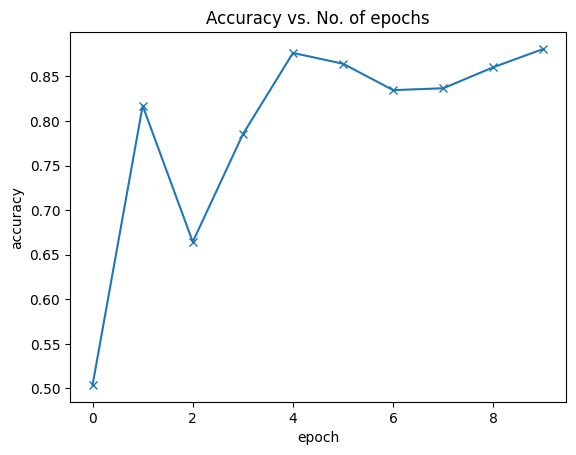

In [ ]:
# the model is trained for 10 epochs with a learning rate of 0.005.
metrics = train_epocs(model, epochs=10, lr=0.005)
print('validation set:', evaluate(model, x_val, y_val))
plot_accuracies(metrics)

Epoch [0], train_loss: 0.2871, train_acc: 0.8910
Epoch [1], train_loss: 0.2805, train_acc: 0.8919
Epoch [2], train_loss: 0.2690, train_acc: 0.8957
Epoch [3], train_loss: 0.2582, train_acc: 0.8995
Epoch [4], train_loss: 0.2514, train_acc: 0.9006
Epoch [5], train_loss: 0.2458, train_acc: 0.9029
Epoch [6], train_loss: 0.2388, train_acc: 0.9057
Epoch [7], train_loss: 0.2316, train_acc: 0.9076
Epoch [8], train_loss: 0.2266, train_acc: 0.9109
Epoch [9], train_loss: 0.2226, train_acc: 0.9133
validation set: {'loss': 0.2533510625362396, 'accuracy': 0.8880000114440918}


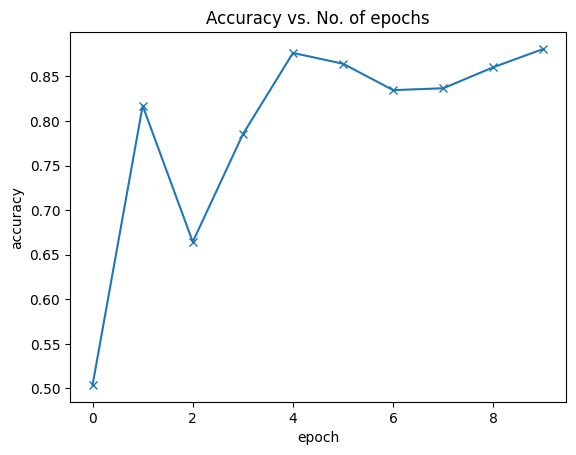

In [ ]:
# The model is trained for 10 epochs with a learning rate of 0.001

train_epocs(model, epochs=10, lr=0.001)
print('validation set:', evaluate(model, x_val, y_val))
plot_accuracies(metrics)

Epoch [0], train_loss: 0.2308, train_acc: 0.9061
Epoch [1], train_loss: 0.2141, train_acc: 0.9165
Epoch [2], train_loss: 0.2140, train_acc: 0.9181
Epoch [3], train_loss: 0.2136, train_acc: 0.9189
Epoch [4], train_loss: 0.2057, train_acc: 0.9227
Epoch [5], train_loss: 0.1991, train_acc: 0.9250
Epoch [6], train_loss: 0.1974, train_acc: 0.9241
Epoch [7], train_loss: 0.1957, train_acc: 0.9247
Epoch [8], train_loss: 0.1906, train_acc: 0.9281
Epoch [9], train_loss: 0.1851, train_acc: 0.9312
Epoch [10], train_loss: 0.1821, train_acc: 0.9327
Epoch [11], train_loss: 0.1804, train_acc: 0.9335
Epoch [12], train_loss: 0.1771, train_acc: 0.9348
Epoch [13], train_loss: 0.1722, train_acc: 0.9367
Epoch [14], train_loss: 0.1680, train_acc: 0.9392
Epoch [15], train_loss: 0.1653, train_acc: 0.9395
Epoch [16], train_loss: 0.1627, train_acc: 0.9416
Epoch [17], train_loss: 0.1591, train_acc: 0.9424
Epoch [18], train_loss: 0.1551, train_acc: 0.9454
Epoch [19], train_loss: 0.1520, train_acc: 0.9474
Epoch [20]

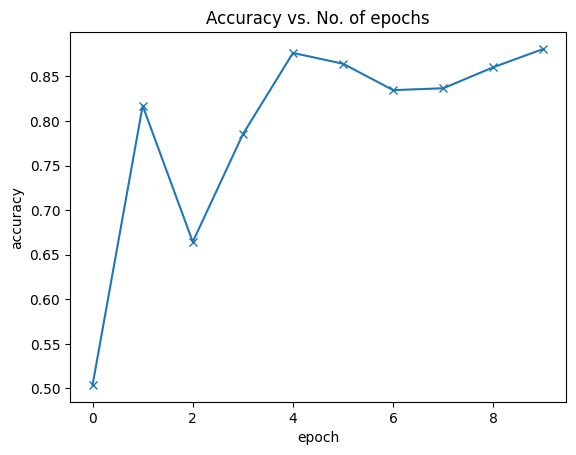

In [ ]:
# The model is trained for 100 epochs with a learning rate of 0.001
train_epocs(model, epochs=100, lr=0.001)
print('validation set:', evaluate(model, x_val, y_val))
plot_accuracies(metrics)

In [ ]:
# evaluate the performance of our trained CNN model on the test dataset
y_test = y_test.view(-1, 1)
print('test set:', evaluate(model, x_test, y_test))

test set: {'loss': 0.2762192487716675, 'accuracy': 0.9079999923706055}


In [ ]:
# merging the stock dataset and news dataset
df = pd.merge(df, df2, on='Date', how='left')

In [ ]:

# Define function to compute SubjObj score using CNN model
def compute_subjobj_score(df, model, vocab2index, max_len=40):
    df = df.copy()
    df['combined_news'] = df.loc[:, 'Top1':'Top25'].agg(' '.join, axis=1)

    def encode_sentence(s):
        enc = np.zeros(max_len, dtype=np.int32)
        words = s.split()
        enc1 = np.array([vocab2index.get(w, vocab2index["UNK"]) for w in words])
        l = min(max_len, len(enc1))
        enc[:l] = enc1[:l]
        return enc

    encoded = np.vstack([encode_sentence(text) for text in df['combined_news']])
    x_tensor = torch.LongTensor(encoded)

    model.eval()
    with torch.no_grad():
        preds = (model(x_tensor) > 0).int().squeeze().numpy()

    df['SubjObj_Pred'] = preds
    daily_scores = df.groupby('Date')['SubjObj_Pred'].mean().reset_index()
    daily_scores.rename(columns={'SubjObj_Pred': 'SubjObj_Score'}, inplace=True)
    return daily_scores


In [ ]:
# Split your full dataset by date
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

# Compute daily SubjObj scores using your trained CNN
train_scores = compute_subjobj_score(train, model, vocab2index)
test_scores = compute_subjobj_score(test, model, vocab2index)


In [ ]:
# Concatenate train and test scores
subjobj_scores = pd.concat([train_scores, test_scores])

# Merge back into the full df
df = pd.merge(df, subjobj_scores, on="Date", how="left")

print(df.columns)

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'combined news', 'clean text', 'compound', 'neg',
       'pos', 'neu', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'SubjObj_Score'],
      dtype='object')


In [ ]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,neg,pos,neu,Open,High,Low,Close,Volume,Adj Close,SubjObj_Score
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,0.287,0.067,0.646,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0.0
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,0.284,0.103,0.613,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1.0
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,0.259,0.091,0.650,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0.0
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,0.199,0.104,0.697,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,1.0
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,0.249,0.131,0.620,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.0


In [ ]:
# Save our dataframe as a CSV
df.to_csv('df.csv', index=False)

# Import the Colab files module
from google.colab import files

# Download the file
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Select daily financial features
# aggregating the train and test datasets by Date, so that each date has just one row
# Group the train and test dataset by Date to create one row per day
# Use 'first' for stock prices (they are repeated for each news headline)
# Use 'mean' for sentiment scores

train_finance = train.groupby('Date').agg({
    'Open': 'first', # First available Open price of the day
    'High': 'first', # First available High price
    'Low': 'first',
    'Close': 'first',
    'Volume': 'first',
    'Label': 'first',
    'compound': 'mean', # Average compound sentiment score
    'neg': 'mean',      # Average negative sentiment score
    'pos': 'mean',
    'neu': 'mean',
    'Adj Close': 'first' #First available Adjusted Close price
}).reset_index()

test_finance = test.groupby('Date').agg({
    'Open': 'first',
    'High': 'first',
    'Low': 'first',
    'Close': 'first',
    'Volume': 'first',
    'Label': 'first',
    'compound': 'mean',
    'neg': 'mean',
    'pos': 'mean',
    'neu': 'mean',
    'Adj Close': 'first'
}).reset_index()

# Merge with daily SubjObj score
train_final = pd.merge(train_finance, train_scores, on='Date')
test_final = pd.merge(test_finance, test_scores, on='Date')


In [ ]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,neg,pos,neu,Open,High,Low,Close,Volume,Adj Close,SubjObj_Score
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,0.287,0.067,0.646,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0.0
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,0.284,0.103,0.613,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1.0
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,0.259,0.091,0.650,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0.0
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,0.199,0.104,0.697,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,1.0
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,0.249,0.131,0.620,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.0


# train and evaluate a stock market movement prediction model using machine learning

Train Accuracy: 0.8473118279569892
Test Accuracy: 0.8888888888888888
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       186
           1       0.85      0.94      0.90       192

    accuracy                           0.89       378
   macro avg       0.89      0.89      0.89       378
weighted avg       0.89      0.89      0.89       378

Confusion Matrix (Test):
 [[155  31]
 [ 11 181]]
True Negatives: 155, False Positives: 31, False Negatives: 11, True Positives: 181


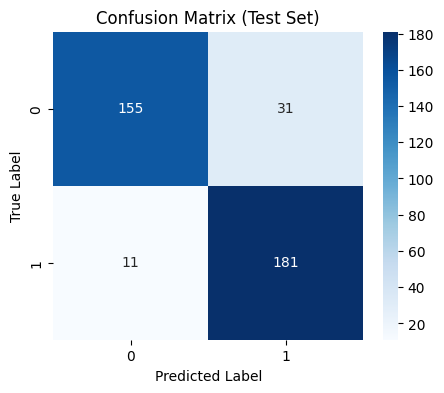

In [ ]:
#XGBoost
# Define features and target
features = ['compound', 'neg','pos', 'neu', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close','SubjObj_Score']
target = 'Label'

X_train = train_final[features]
y_train = train_final[target]
X_test = test_final[features]
y_test = test_final[target]

# Train XGBoost
xgb_model = XGBClassifier(n_estimators=300, max_depth=3, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test):\n", cm)

# get TP, FP, FN, TN if binary classification
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)')
plt.show()


Train Accuracy: 1.0
Test Accuracy: 0.955026455026455
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       186
           1       0.95      0.96      0.96       192

    accuracy                           0.96       378
   macro avg       0.96      0.95      0.96       378
weighted avg       0.96      0.96      0.96       378

Confusion Matrix (Test):
 [[177   9]
 [  8 184]]
True Negatives: 177, False Positives: 9, False Negatives: 8, True Positives: 184


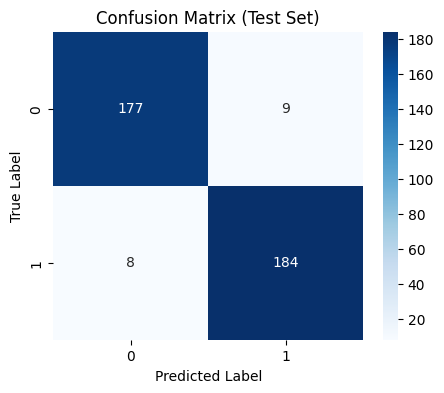

In [ ]:

# Train random forest
rf_model = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test):\n", cm)

# get TP, FP, FN, TN if binary classification
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.9693548387096774
Test Accuracy: 0.955026455026455
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       186
           1       0.97      0.94      0.96       192

    accuracy                           0.96       378
   macro avg       0.96      0.96      0.96       378
weighted avg       0.96      0.96      0.96       378

Confusion Matrix (Test):
 [[180   6]
 [ 11 181]]
True Negatives: 180, False Positives: 6, False Negatives: 11, True Positives: 181


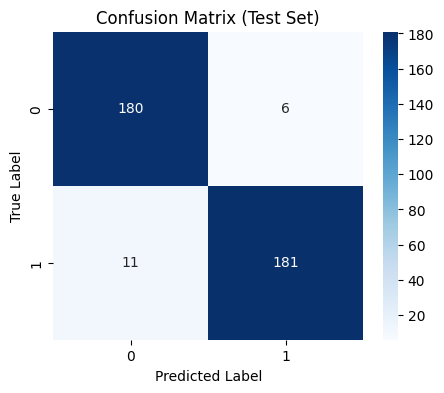

In [ ]:

# Train Logistic Regression
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

# Predictions
y_train_pred = lg_model.predict(X_train)
y_test_pred = lg_model.predict(X_test)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test):\n", cm)

# get TP, FP, FN, TN if binary classification
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)')
plt.show()


Train Accuracy: 0.6881720430107527
Test Accuracy: 0.6111111111111112
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.62      0.55      0.58       186
           1       0.61      0.67      0.64       192

    accuracy                           0.61       378
   macro avg       0.61      0.61      0.61       378
weighted avg       0.61      0.61      0.61       378

Confusion Matrix (Test):
 [[103  83]
 [ 64 128]]
True Negatives: 103, False Positives: 83, False Negatives: 64, True Positives: 128


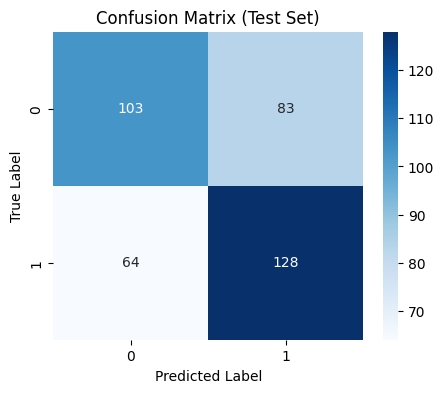

In [ ]:
#K-nearest neighbours
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predictions
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test):\n", cm)

# get TP, FP, FN, TN if binary classification
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)')
plt.show()

Train Accuracy: 1.0
Test Accuracy: 0.9523809523809523
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       186
           1       0.94      0.97      0.95       192

    accuracy                           0.95       378
   macro avg       0.95      0.95      0.95       378
weighted avg       0.95      0.95      0.95       378

Confusion Matrix (Test):
 [[174  12]
 [  6 186]]
True Negatives: 174, False Positives: 12, False Negatives: 6, True Positives: 186


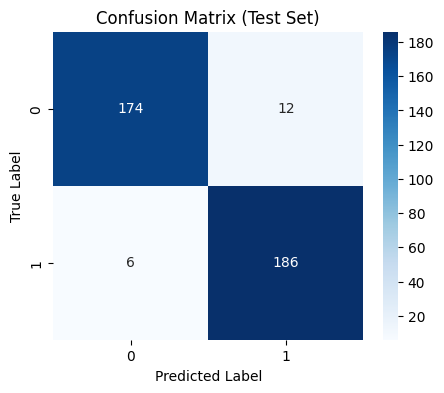

In [ ]:
#Decision tree classifier
Dt_model = DecisionTreeClassifier()
Dt_model.fit(X_train, y_train)

# Predictions
y_train_pred = Dt_model.predict(X_train)
y_test_pred = Dt_model.predict(X_test)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test):\n", cm)

# get TP, FP, FN, TN if binary classification
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)')
plt.show()

Train Accuracy: 0.5473118279569893
Test Accuracy: 0.5105820105820106
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.60      0.02      0.03       186
           1       0.51      0.99      0.67       192

    accuracy                           0.51       378
   macro avg       0.55      0.50      0.35       378
weighted avg       0.55      0.51      0.36       378

Confusion Matrix (Test):
 [[  3 183]
 [  2 190]]
True Negatives: 3, False Positives: 183, False Negatives: 2, True Positives: 190


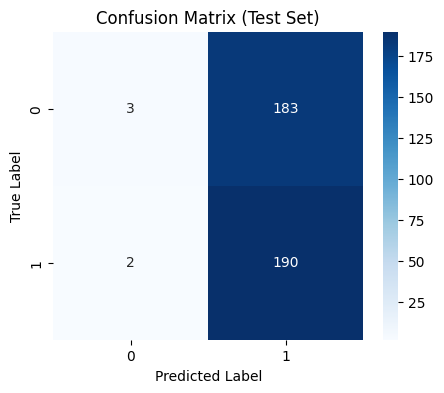

In [ ]:
#Gaussian Naive Bayes
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)

# Predictions
y_train_pred = GNB_model.predict(X_train)
y_test_pred = GNB_model.predict(X_test)

# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test):\n", cm)

# get TP, FP, FN, TN if binary classification
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# **regression: prediction stock price by LSTM**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving df.csv to df.csv


In [ ]:
df=pd.read_csv("df.csv")

In [ ]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,neg,pos,neu,Open,High,Low,Close,Volume,Adj Close,SubjObj_Score
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,0.287,0.067,0.646,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0.0
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,0.284,0.103,0.613,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1.0
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,0.259,0.091,0.650,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0.0
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,0.199,0.104,0.697,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,1.0
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,0.249,0.131,0.620,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.0


In [ ]:
# Select features
features = ['compound', 'neg','pos', 'neu', 'Open', 'High', 'Low', 'Close', 'Volume' ,'SubjObj_Score']
target = 'Adj Close'

df = df.dropna(subset=features + [target]).reset_index(drop=True)

In [ ]:
# Time-based Train/Test Split
train = df[df['Date'] < '2015-01-01']
test  = df[df['Date'] >= '2015-01-01']

# Scaling
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train = X_scaler.fit_transform(train[features])
y_train = y_scaler.fit_transform(train[[target]])
X_test  = X_scaler.transform(test[features])
y_test  = y_scaler.transform(test[[target]])


In [ ]:
# Sequence Creation
# we creat sequences of time steps as input for the LSTM mode
SEQ_LEN = 10
def create_sequences(X, y, seq_len=SEQ_LEN):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i:i+seq_len]) # input sequence of 10 days
        ys.append(y[i+seq_len]) # target is the value right after that sequence
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train, y_train, SEQ_LEN)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, SEQ_LEN)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)



# LSTM Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(SEQ_LEN, X_train_seq.shape[2])), # First LSTM layer with 128 units, returns full sequences for the next LSTM layer
    Dropout(0.1), # Dropout layer to prevent overfitting
    LSTM(64, return_sequences=True),  # Second LSTM layer with 64 units
    Dropout(0.1),
    LSTM(32), # Third (final) LSTM layer with 32 units, returns only the last output
    Dropout(0.1),  # Final Dropout layer before output
    Dense(1)
])
# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# training Lstm model
history = model.fit(
    X_train_seq, y_train_seq, # Training input sequences and target values
    epochs=200,
    batch_size=8,
    validation_split=0.1,
    # Use EarlyStopping to stop training if validation loss doesn't improve for 20 epochs
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)],
    verbose=1  # prints a progress bar for each epoch during training
)

Epoch 1/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0332 - val_loss: 0.0011
Epoch 2/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 3/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 4/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 5/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0021 - val_loss: 9.6867e-04
Epoch 6/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0019 - val_loss: 0.0075
Epoch 7/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 8/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0019 - val_loss: 0.0038
Epoch 9/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0018 - val_loss: 5.5818e-04
Epoch 10/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0020 - val_loss: 6.2269e-04
Epoch 11/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0015 - val_loss: 0.0071
Epoch 12/200
180/

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
📊 MSE: 29065.0495
📉 RMSE: 170.4847
📈 MAE: 128.1108
🎯 R² Score: 0.9208
MAPE: 0.74%


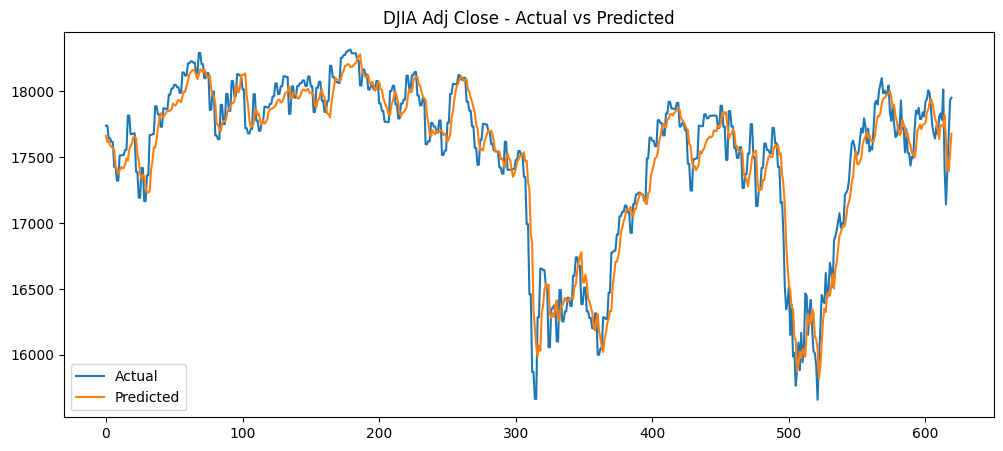

In [ ]:



# Evaluation
y_pred = model.predict(X_test_seq) # Predict stock prices on the test set
y_test_inv = y_scaler.inverse_transform(y_test_seq) # Inverse-transform the normalized true target values back to original scale
y_pred_inv = y_scaler.inverse_transform(y_pred) # Inverse-transform the normalized predicted values back to original scale

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv) # Mean Squared Error
rmse = np.sqrt(mse) # Root Mean Squared Error
mae = mean_absolute_error(y_test_inv, y_pred_inv) # Mean Absolute Error
r2 = r2_score(y_test_inv, y_pred_inv) # R² Score
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) *100  # Mean Absolute Percentage Error

print(f"📊 MSE: {mse:.4f}")
print(f"📉 RMSE: {rmse:.4f}")
print(f"📈 MAE: {mae:.4f}")
print(f"🎯 R² Score: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

# Plotting Actual vs Predicted Stock Prices
plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.title('DJIA Adj Close - Actual vs Predicted')
plt.show()


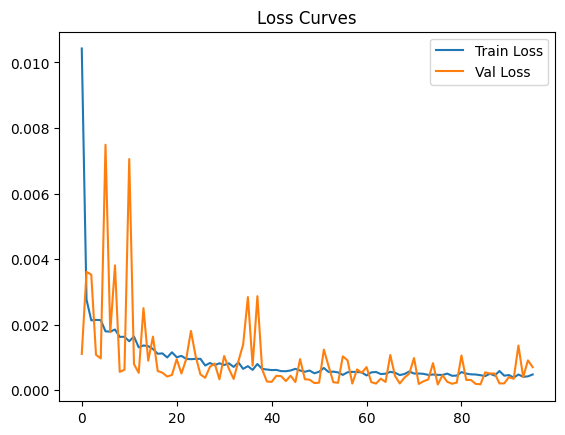

In [ ]:
# training and validation loss curves
plt.plot(history.history['loss'], label='Train Loss') # Plot the training loss over epochs
plt.plot(history.history['val_loss'], label='Val Loss') # Plot the validation loss over epochs
plt.legend()
plt.title('Loss Curves')
plt.show()

In [ ]:
# evaluate the LSTM model's performance using the R² score
train_preds = model.predict(X_train_seq) # Predict target values on the training data
val_preds = model.predict(X_test_seq)  # Predict target values on the test data

print("Train R²:", r2_score(y_train_seq, train_preds)) # Print R² on the training data
print("Val R²:", r2_score(y_test_seq, val_preds)) # Print R² on the test data

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Train R²: 0.9965404687388418
Val R²: 0.92078671094678
